In [73]:
import scipy.integrate
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft,fftfreq
from scipy.signal import find_peaks
from scipy.optimize import fsolve
import math

import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 

import matplotlib.pyplot as plt 

In [74]:
def SIRmodel_normal(y,t,beta,gamma):
    S,I,R=y
    dSdt=-beta*S*I
    dIdt=beta*S*I-gamma*I
    dRdt=gamma*I
    return([dSdt,dIdt,dRdt])

def SIR_curve(Z,day,beta,gamma):
    X,Y,R=Z
    dXdt=-beta*X*Y/763
    dYdt=beta*X*Y/763-gamma*Y
    dRdt=gamma*Y
    return([dXdt,dYdt,dRdt])

def SIRmodel_demography(y,t,beta,gamma,mu):
    S,I,R=y
    dSdt=mu-beta*S*I-mu*S
    dIdt=beta*S*I-(mu+gamma)*I
    dRdt=gamma*I-mu*R
    return([dSdt,dIdt,dRdt])

def SIRmodel_mortalityF(y,t,beta,gamma,mu,rho):
    X,Y,Z=y
    dXdt=mu-beta*X*Y/sum(y)-mu*X
    dYdt=beta*X*Y/sum(y)-(mu+gamma)*Y/(1-rho)
    dZdt=gamma*Y-mu*Z
    return([dXdt,dYdt,dZdt])
def SIRmodel_mortalityD(y,t,beta,gamma,mu,rho):
    X,Y,Z=y
    dXdt=mu-beta*X*Y-mu*X
    dYdt=beta*X*Y-(mu+gamma)*Y/(1-rho)
    dZdt=gamma*Y-mu*Z
    return([dXdt,dYdt,dZdt])


def SEIR(SEIR,t,beta,gamma,mu,sigma):
    S,E,I,R=SEIR
    dSdt=mu-beta*S*I-mu*S
    dEdt=beta*S*I-(mu+sigma)*E
    dIdt=sigma*E-(mu+gamma)*I
    dRdt=gamma*I-mu*R
    return [dSdt,dEdt,dIdt,dRdt] 

def beta(beta0,beta1,omg,t):
    return(beta0*(1+beta1*math.cos(omg*t)))

def SEIRSF(SEIR,t,args):
    S,E,I,R=SEIR
    beta0,beta1,mu,gamma,sigma=args
    dSdt=mu-beta(beta0,beta1,omg,t)*S*I-mu*S
    dEdt=beta(beta0,beta1,omg,t)*S*I-(mu+sigma)*E
    dIdt=sigma*E-(mu+gamma)*I
    dRdt=gamma*I-mu*R
    return [dSdt,dEdt,dIdt,dRdt] 

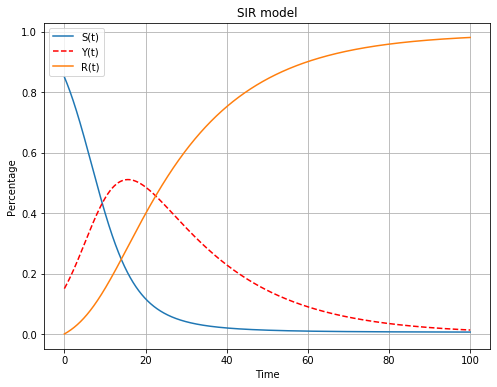

In [3]:
#problem1.1




#we need initial values and odes
#basically the def can have three variables, y is the main variables and t is time,then you can have arges(beta,gamma)

#funccallable(y, t, …) or callable(t, y, …)
#Computes the derivative of y at t. If the signature is callable(t, y, ...), then the argument tfirst must be set True.
#y0array
#Initial condition on y (can be a vector).
#tarray
#A sequence of time points for which to solve for y. The initial value point should be the first element of this sequence. This sequence must be monotonically increasing or monotonically decreasing; repeated values are allowed.
#argstuple, optional
#Extra arguments to pass to function.
S0=0.85
I0=0.15
R0=0.0
beta=0.25
gamma=0.05

t=np.linspace(0,100,100000)#first in the intial time, second is end time, and the thrid one is time interval

#odeint(function,initial value,x variables,parameters)
solution=scipy.integrate.odeint(SIRmodel_normal,[S0,I0,R0],t,args=(beta,gamma))

solution=np.array(solution)

plt.figure(figsize=[8,6])
plt.plot(t,solution[:,0],label="S(t)")
plt.plot(t,solution[:,1],'r--',label="Y(t)")
plt.plot(t,solution[:,2],label="R(t)")
plt.xlabel('Time')
plt.ylabel('Percentage')
plt.title('SIR model')
plt.legend(loc='best')
plt.savefig("SIRmodel1.jpg",DPI=(1500,1500))
plt.grid()
plt.show()


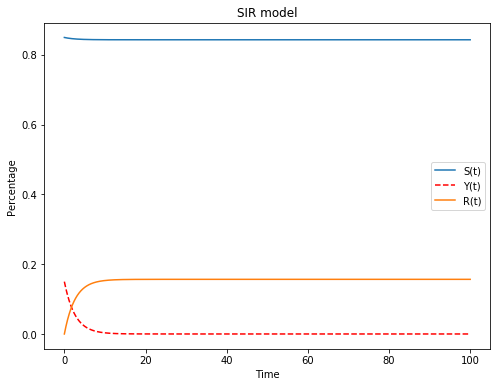

In [4]:
S0=0.85
I0=0.15
R0=0.0
beta=0.02
gamma=0.4

t=np.linspace(0,100,100000)#first in the intial time, second is end time, and the thrid one is time interval

solution=scipy.integrate.odeint(SIRmodel_normal,[S0,I0,R0],t,args=(beta,gamma))
solution=np.array(solution)
solution
plt.figure(figsize=[8,6])
plt.plot(t,solution[:,0],label="S(t)")
plt.plot(t,solution[:,1],'r--',label="Y(t)")
plt.plot(t,solution[:,2],label="R(t)")
plt.xlabel('Time')
plt.ylabel('Percentage')
plt.title('SIR model')
plt.legend(loc=5)
plt.savefig("SIRmodel2.jpg",DPI=(1500,1500))
plt.show()

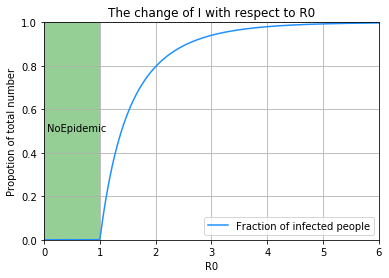

In [5]:
#the R0 and infectious people
#define a function for fsolve to Rinfinite
def Rinf(R_infinity, S0, R0):
    return 1-R_infinity-S0 * np.power(np.e, -R_infinity*R0)

S0 = 0.99999
R0 = np.arange(0, 6, 0.01)
Result = fsolve(Rinf, R0, args=(S0, R0,))

plt.plot(R0,Result, label="Fraction of infected people",c="#1E90FF")
plt.legend(loc='best')
plt.xlabel("R0")
plt.ylabel("Propotion of total number")
plt.title("The change of I with respect to R0")
plt.axvspan(0, 1, facecolor='#2ca02c', alpha=0.5)
plt.xlim(0,6)
plt.ylim(0,1)
plt.grid()
plt.text(0.05, 0.5, r'NoEpidemic', fontsize=10)
plt.savefig("SIRmodel3.jpg",DPI=(1500,1500))
plt.show()


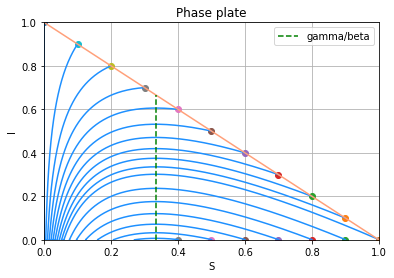

In [6]:
#funccallable(y, t, …) or callable(t, y, …)
#Computes the derivative of y at t. If the signature is callable(t, y, ...), then the argument tfirst must be set True.
#y0array
#Initial condition on y (can be a vector).
#tarray
#A sequence of time points for which to solve for y. The initial value point should be the first element of this sequence. This sequence must be monotonically increasing or monotonically decreasing; repeated values are allowed.
#argstuple, optional
#Extra arguments to pass to function.
#curvefit

#setting parameters

beta=3
gamma=1

R0=beta/gamma
#plot I+S=1 
for i in np.arange(1.0,-0.1,-0.1):
    t=np.linspace(0,100,10000)
    y0=[i,1-i,0]
    plt.plot(y0[0],y0[1],'o')
    solution=scipy.integrate.odeint(SIRmodel_normal,y0,t,args=(beta,gamma))
    S=solution[:,0]
    I=solution[:,1]
    R=solution[:,2]
    plt.plot(S,I,'#1E90FF')

#plot s=i i=0.001
for i in np.arange(1.0,0.3,-0.1):
    t=np.linspace(0,100,10000)
    y0=[i,0.001,0]
    plt.plot(y0[0],y0[1],"o")
    solution=scipy.integrate.odeint(SIRmodel_normal,y0,t,args=(beta,gamma))
    S=solution[:,0]
    I=solution[:,1]
    R=solution[:,2]
    plt.plot(S,I,"#1E90FF")

s=np.arange(1,-0.1,-0.1)
i=-s+1
plt.plot(s,i,"#FFA07A")
plt.plot([1/R0,1/R0],[0,1-1/R0],'g--',label="gamma/beta")
plt.legend(loc='best')
plt.xlabel('S')
plt.ylabel('I')
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()
plt.title('Phase plate')
plt.savefig("SIRmodelphase.jpg",DPI=(1500,1500))

beta and gamma= 1.6651160221058046 0.4476099645165824


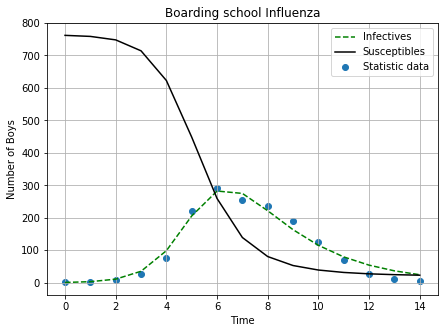

In [7]:
Y=np.array([1,3,8,28,75,221,291,255,235,190,125,70,28,12,5])
day=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])

def dXYZ(N,day,beta,gam):
    X,Y,Z=N
    dXdt=-beta*X*Y/total
    dYdt=beta*X*Y/total-gam*Y
    dZdt=gam*Y
    return [dXdt,dYdt,dZdt]


total=763
N0=[total-Y[0],Y[0],0]

#预设一个beta gamma 并产生值
def XYZ(day,beta,gam):
    return scipy.integrate.odeint(dXYZ,N0,day,args=(beta,gam))[:,1]
#将值带入并合成最合适的beta gamma
K0,pcov=scipy.optimize.curve_fit(XYZ,day,Y)
fitted_XYZ=XYZ(day,*K0)

beta,gamma=K0
N=scipy.integrate.odeint(dXYZ,N0,day,args=(beta,gamma))
X=N[:,0]
print("beta and gamma=",beta,gamma)
plt.figure(figsize=[7,5])
plt.title('Boarding school Influenza')
plt.xlabel('Time')
plt.ylabel('Number of Boys')
plt.scatter(day,Y,label='Statistic data')
plt.plot(day,fitted_XYZ,'g--',label='Infectives')
plt.plot(day,X,'k',label='Susceptibles')
plt.legend()
plt.grid()
plt.savefig("Boarding.jpg",DPI=(1500,1500))
plt.show()


Maximum of Susceptible: 205


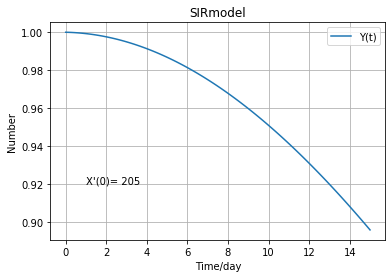

Using mass vaccination strategy-maximum of Susceptible: 205


In [8]:
#problem1.3

beta,gamma= 1.6651160221058046,0.4476099645165824
t=np.linspace(0,15,100)

#use a loop to find a Maximum of Susceptible

for i in np.arange(762,0,-1):
    Z=[i,1,0]
#find the first I slope<0
    dydt=(beta*Z[0]*Z[1]/763-gamma*Z[1])
    if dydt<0:
        print('Maximum of Susceptible:',i)
        solution=scipy.integrate.odeint(dXYZ,Z,t,args=(beta,gamma))
        #plt.plot(t,solution[:,0],'#87CEFA',label="S(t)")
        plt.plot(t,solution[:,1],label="Y(t)")
        #plt.plot(t,solution[:,2],label="R(t)")
        plt.title("SIRmodel")
        plt.xlabel("Time/day")
        plt.ylabel("Number")
        plt.text(1,0.92,"X'(0)= 205")
        plt.grid()
        plt.legend(loc='best')
        plt.savefig("Vaccination.jpg",DPI=(1500,1500))
        plt.show()
        break

#using Mass vaccination strategy 
R0=beta/gamma
p=1-1/R0
max_suspectible=763-p*763

print("Using mass vaccination strategy-maximum of Susceptible:",int(max_suspectible))
        
    
   


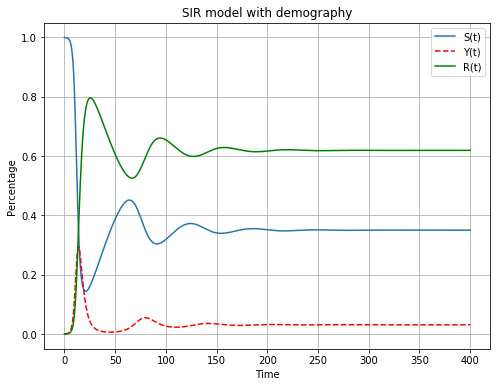

In [119]:
#problem2.1
y=[1-2.5*10**(-4),0.00025,0]
mu=1/60
beta=1
gamma=1/3

t=np.arange(0,400,0.01)#first in the intial time, second is end time, and the thrid one is time interval

solution=scipy.integrate.odeint(SIRmodel_demography,y,t,args=(beta,gamma,mu))
solution=np.array(solution)
solution
plt.figure(figsize=[8,6])
plt.title("SIR model with demography")
plt.plot(t,solution[:,0],label="S(t)")
plt.plot(t,solution[:,1],'r--',label="Y(t)")
plt.plot(t,solution[:,2],'g-',label="R(t)")
plt.grid()
plt.xlabel('Time')
plt.ylabel('Percentage')
plt.legend(loc='best')
plt.savefig("SIRD1.jpg",DPI=(1500,1500))
plt.show()
I_demography1=solution[:,1]

normlized_fft_I and length of frequ: 40000 40000
Frequency and Amplitude: 0.015 0.007636043486955089
Frequency and Amplitude: 0.03 0.005145443792868834
estimated freq of I wave: 0.01656537168406829
Damping time: 64.61538461538461


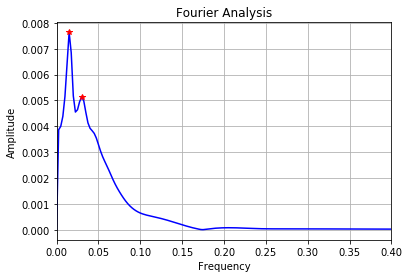

In [185]:
#fourier analysis
#ial parameter
rate=100
time_spacing=1/rate
t=np.arange(0,400,time_spacing)

fft_I = fft(I_demography1-np.mean(I_demography1))
## FFT return the Normlized magnitute of wave of each freq
normlized_fft_I = abs(fft_I)/len(t)
#find frequency

X_freq = fftfreq(normlized_fft_I.size, time_spacing)#in order to find the x axis
#fftfreq(n, d)  n : int Window length.   d : scalarSample spacing
print("normlized_fft_I and length of frequ:", normlized_fft_I.size,len(X_freq))
plt.plot(X_freq[0:250],normlized_fft_I[0:250], c="blue")  # First freq can be aboundent
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.xlim(0,0.4)
plt.title("Fourier Analysis")

#find peaks
peaks, _ = find_peaks(normlized_fft_I[0:150], height=0.005)#height can be dicided by u and initial is the minimum 

for i in range(len(peaks)):
    print("Frequency and Amplitude:",X_freq[peaks[i]],normlized_fft_I[peaks[i]])
    x=X_freq[peaks[i]]
    y=normlized_fft_I[peaks[i]]
    plt.plot(x,y,"r*")
# Theoretical frequency
plt.savefig("SIRDFourier.jpg",DPI=(1500,1500))
mu=1/(60)
beta=1
gamma=1/3
R_sub_0 = beta/(gamma+mu)
A=1/(mu*(R_sub_0-1))
G=1/(gamma+mu)
test_T = 2*np.pi*np.sqrt(A*G)
D=2*A
print("estimated freq of I wave:", 1/test_T)
print("Damping time:", D)

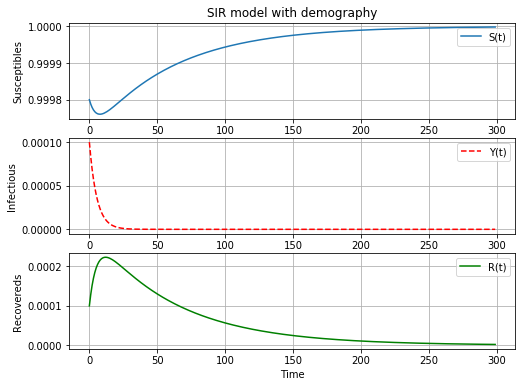

In [186]:

y=[1-2e-4,1e-4,1e-4]
beta=1/6
gamma=1/3
mu=1/60


t=np.arange(0,300,1)#first in the intial time, second is end time, and the thrid one is time interval

solution=scipy.integrate.odeint(SIRmodel_demography,y,t,args=(beta,gamma,mu))
solution=np.array(solution)
solution
plt.figure(figsize=[8,6])
plt.subplot(311)
plt.title("SIR model with demography")
plt.plot(t,solution[:,0],label="S(t)")
plt.grid()
plt.xlabel('Time')
plt.ylabel('Susceptibles')
plt.legend(loc='best')
plt.subplot(312)
plt.plot(t,solution[:,1],'r--',label="Y(t)")
plt.grid()
plt.xlabel('Time')
plt.ylabel('Infectious')
plt.legend(loc='best')
plt.subplot(313)
plt.plot(t,solution[:,2],'g-',label="R(t)")
plt.grid()
plt.xlabel('Time')
plt.ylabel('Recovereds')
plt.legend(loc='best')
plt.savefig("SIRD2.jpg",DPI=(1500,1500))
plt.show()

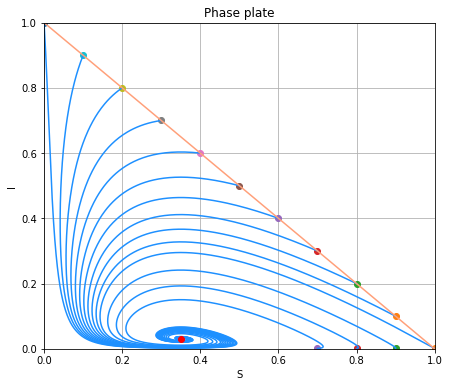

In [187]:

#setting parameters
beta=1
gamma=1/3
mu=1/60
R0=beta/(gamma+mu)
#plot I+S=1 
plt.figure(figsize=[7,6])
for i in np.arange(1.0,-0.1,-0.1):
    t=np.linspace(0,300,10000)
    y0=[i,1-i,0]
    plt.plot(y0[0],y0[1],'o')
    solution=scipy.integrate.odeint(SIRmodel_demography,y0,t,args=(beta,gamma,mu))
    S=solution[:,0]
    I=solution[:,1]
    R=solution[:,2]
    plt.plot(S,I,'#1E90FF')

#plot s=i i=0.001
for i in np.arange(1.0,0.6,-0.1):
    t=np.linspace(0,300,10000)
    y0=[i,0.001,0]
    plt.plot(y0[0],y0[1],"o")
    solution=scipy.integrate.odeint(SIRmodel_demography,y0,t,args=(beta,gamma,mu))
    S=solution[:,0]
    I=solution[:,1]
    R=solution[:,2]
    plt.plot(S,I,"#1E90FF")

s=np.arange(1,-0.1,-0.1)
i=-s+1
plt.plot(s,i,"#FFA07A")
plt.plot(1/R0,(mu/beta)*(R0-1),'ro')
plt.xlabel('S')
plt.ylabel('I')
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()
plt.title('Phase plate')
plt.savefig("SIRDP1.jpg",DPI=(1500,1500))

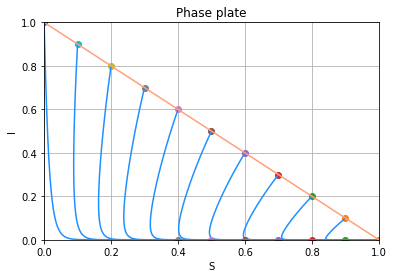

In [188]:
#setting parameters
beta=1/2
gamma=1
mu=1/60
R0=beta/gamma
#plot I+S=1 
for i in np.arange(1.0,-0.1,-0.1):
    t=np.linspace(0,300,10000)
    y0=[i,1-i,0]
    plt.plot(y0[0],y0[1],'o')
    solution=scipy.integrate.odeint(SIRmodel_demography,y0,t,args=(beta,gamma,mu))
    S=solution[:,0]
    I=solution[:,1]
    R=solution[:,2]
    plt.plot(S,I,'#1E90FF')

#plot s=i i=0.001
for i in np.arange(1.0,0.3,-0.1):
    t=np.linspace(0,300,10000)
    y0=[i,0.001,0]
    plt.plot(y0[0],y0[1],"o")
    solution=scipy.integrate.odeint(SIRmodel_demography,y0,t,args=(beta,gamma,mu))
    S=solution[:,0]
    I=solution[:,1]
    R=solution[:,2]
    plt.plot(S,I,"#1E90FF")

s=np.arange(1,-0.1,-0.1)
i=-s+1
plt.plot(s,i,"#FFA07A")
plt.plot(1/R0,(mu/beta)*(R0-1),'ro')
plt.xlabel('S')
plt.ylabel('I')
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()
plt.title('Phase plate')
plt.savefig("SIRDP2.jpg",DPI=(1500,1500))

In [189]:
#Fourier Analysis 
#initial parameter
# rate=150
# time_spacing=1/rate
# t=np.arange(0,60*365,time_spacing)

# fft_I = fft(I_demography-np.mean(I_demography))
# ## FFT return the Normlized magnitute of wave of each freq
# normlized_fft_I = abs(fft_I)/len(t)
# #find frequency

# X_freq = fftfreq(normlized_fft_I.size, time_spacing)#in order to find the x axis
# #fftfreq(n, d)  n : int Window length.   d : scalarSample spacing
# print("normlized_fft_I and length of frequ:", normlized_fft_I.size,len(X_freq))
# plt.plot(X_freq[0:250],normlized_fft_I[0:250], c="red")  # First freq can be aboundent
# plt.grid()
# plt.xlabel("Frequency")
# plt.ylabel("Amplitute")
# plt.xlim(0,2)
# plt.title("Fourier Analysis")

# #find peaks
# peaks, _ = find_peaks(normlized_fft_I[0:150], height=0.5e-07)#height can be dicided by u and initial is the minimum 

# for i in range(len(peaks)):
#     print("Frequency and Amplitute:",X_freq[peaks[i]],normlized_fft_I[peaks[i]])
    
# # Theoretical frequency
# mu=1/(60*365)
# beta=500/365
# gamma=1/7
# R_sub_0 = beta/(gamma+mu)
# A=1/(mu*(R_sub_0-1))
# G=1/(gamma+mu)
# test_T = 2*np.pi*np.sqrt(A*G)
# print("estimated freq of I wave:", 1/test_T)

0.25
0.5
0.75
S_inf 0.9999824990993997
I_inf -1.0390939210817146e-11


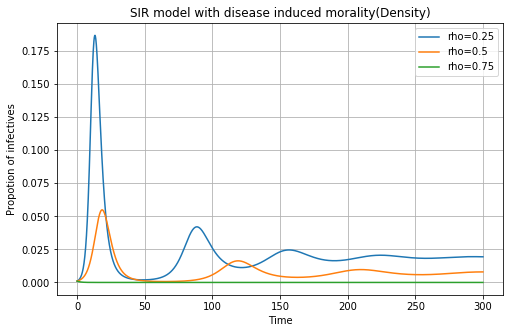

In [91]:
#problem2.2
#R_sub_0 = 3 with demorgraphy
t = np.arange(0, 300, 0.1)
beta = 1
gamma = 1/3
mu = 1/60
fig = plt.figure(figsize=(8,5))
rho=0.2
for rho in np.arange(0.25,1,0.25):
    print(rho)
    SIR_result = scipy.integrate.odeint(SIRmodel_mortalityD, [1, 0.001, 0],t, args=(beta, gamma,mu,rho)) 
    #plt.plot(t, SIR_result[:, 0], label="S",c="blue")
    plt.plot(t, SIR_result[:, 1], label="rho="+str(rho),)
    #plt.plot(t, SIR_result[:, 2], label="R",c="green")
plt.legend(fontsize=10)
plt.title("SIR model with disease induced morality(Density)")
print("S_inf",SIR_result[-1,0])
print("I_inf",SIR_result[-1,1])
plt.grid()
plt.xlabel("Time")
plt.ylabel("Propotion of infectives")
plt.savefig("SIRMD.jpg",DPI=(1500,1500))
plt.show()

0.25
0.5
0.75
S_inf 0.9999824400543011
I_inf -4.889073020382829e-12


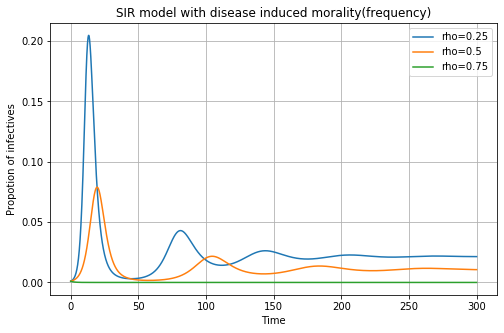

In [6]:
#R_sub_0 = 3 with demorgraphy
t = np.arange(0, 300, 0.1)
beta = 1
gamma = 1/3
mu = 1/60
fig = plt.figure(figsize=(8,5))
rho=0.2
for rho in np.arange(0.25,1,0.25):
    print(rho)
    SIR_result = scipy.integrate.odeint(SIRmodel_mortalityF, [1, 0.001, 0],t, args=(beta, gamma,mu,rho)) 
    #plt.plot(t, SIR_result[:, 0], label="S",c="blue")
    plt.plot(t, SIR_result[:, 1], label="rho="+str(rho),)
    #plt.plot(t, SIR_result[:, 2], label="R",c="green")
plt.legend(fontsize=10)
plt.title("SIR model with disease induced morality(frequency)")
print("S_inf",SIR_result[-1,0])
print("I_inf",SIR_result[-1,1])
plt.grid()
plt.xlabel("Time")
plt.ylabel("Propotion of infectives")
plt.savefig("SIRMF.jpg",DPI=(1500,1500))
plt.show()

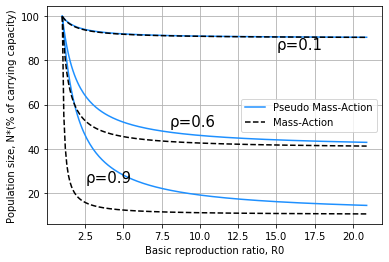

In [203]:


R0=np.arange(1,21,0.1)
ro1=0.1
ro2=0.6
ro3=0.9


den_N1=(1+(1-ro1)*(R0-1))/R0
fre_N1=R0*(1-ro1)/(R0-ro1)
den_N2=(1+(1-ro2)*(R0-1))/R0
fre_N2=R0*(1-ro2)/(R0-ro2)
den_N3=(1+(1-ro3)*(R0-1))/R0
fre_N3=R0*(1-ro3)/(R0-ro3)

plt.plot(R0,den_N1*100,'#1E90FF',label='Pseudo Mass-Action')
plt.plot(R0,den_N2*100,'#1E90FF')
plt.plot(R0,den_N3*100,'#1E90FF')
plt.plot(R0,fre_N1*100,'k--',label='Mass-Action')
plt.plot(R0,fre_N2*100,'k--')
plt.plot(R0,fre_N3*100,'k--')
plt.grid()

plt.ylabel('Population size, N*(% of carrying capacity)')
plt.xlabel('Basic reproduction ratio, R0')
plt.text(2.5,25,'\u03C1'+'=0.9',fontsize=15)
plt.text(15,85,'\u03C1'+'=0.1',fontsize=15)
plt.text(8,50,'\u03C1'+'=0.6',fontsize=15)
plt.legend(loc="best")
plt.savefig("SIRMrho.jpg",DPI=(1500,1500))
plt.show()
#recovery+population size

S_inf 0.38448628871740737
I_inf 0.05708563098444997


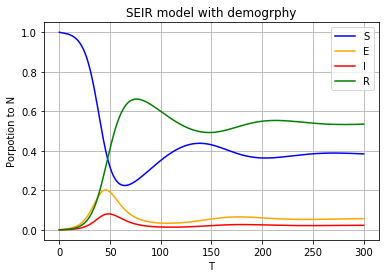

In [89]:
#SEIR
t = np.arange(0, 300, 0.01)
beta = 1
gamma = 1/3
mu = 1/70
sigma = 1/7

SEIR_result = scipy.integrate.odeint(SEIR, [0.9998,0.001, 0.001, 0],
                    t, args=(beta, gamma,mu,sigma)) 

fig = plt.figure()
plt.plot(t, SEIR_result[:, 0], label="S",c="blue")
plt.plot(t, SEIR_result[:, 1], label="E",c="orange")
plt.plot(t, SEIR_result[:, 2], label="I",c="red")
plt.plot(t, SEIR_result[:, 3], label="R",c="green")
plt.legend(fontsize=10)
plt.title("SEIR model with demogrphy")
print("S_inf",SEIR_result[-1,0])
print("I_inf",SEIR_result[-1,1])
plt.grid()
plt.xlabel("T",)
plt.ylabel("Porpotion to N")
plt.savefig("SEIR.jpg",DPI=(1500,1500))
plt.show()
I_demography_death1=SEIR_result[:, 1]

<IPython.core.display.Javascript object>


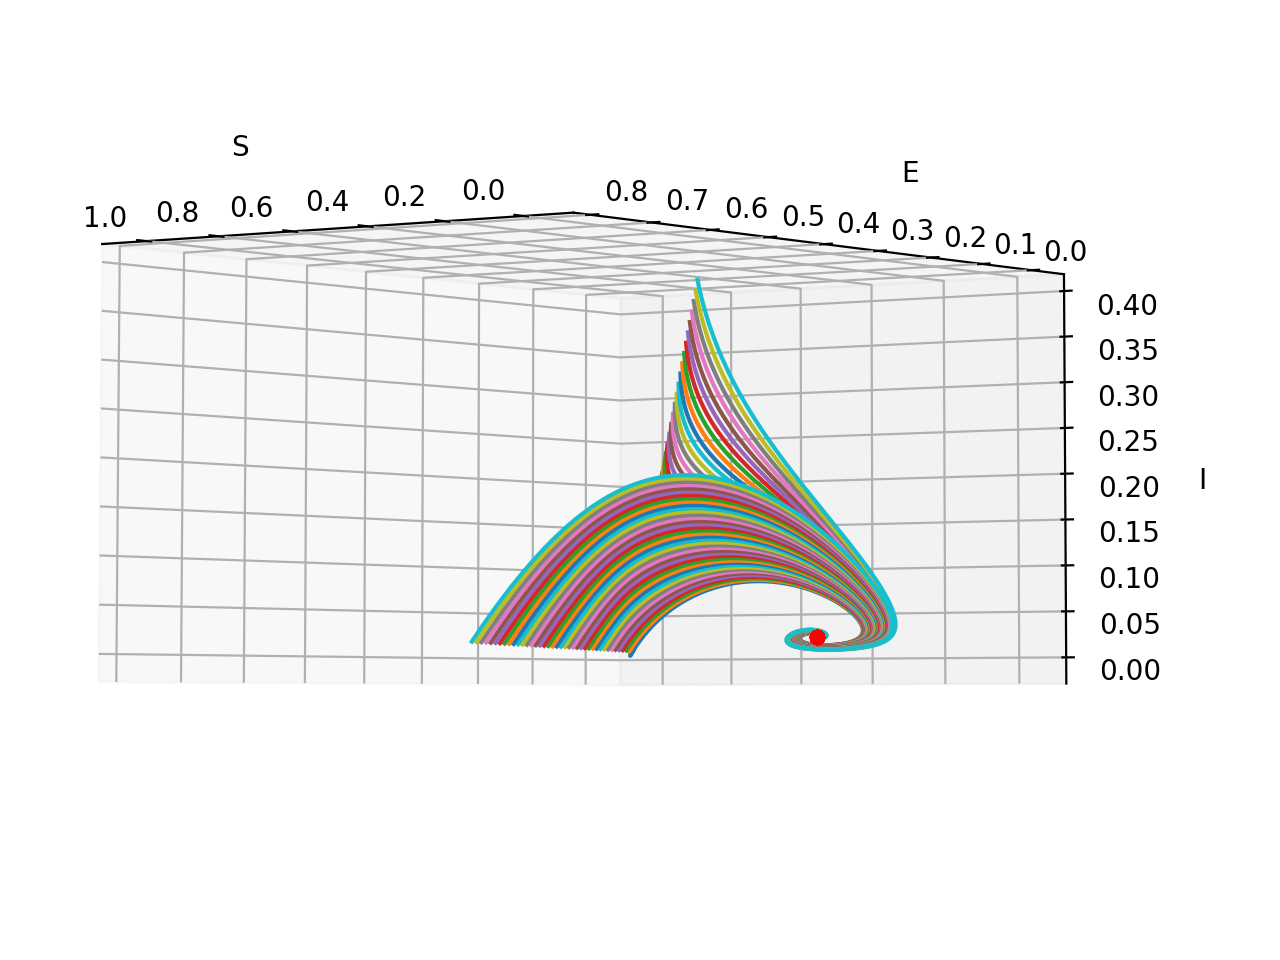

In [79]:
#SEIRphaseplot
t = np.arange(0, 300, 0.01)
beta = 1
gamma = 1/3
mu = 1/70
sigma = 1/7

R0=(beta*sigma)/((mu+gamma)*(mu+sigma))
s1=1/R0
e1=mu*(mu+gamma)*(R0-1)/(beta*sigma)
i1=mu*(R0-1)/beta

fig=plt.figure()
#3D
ax=fig.add_subplot(111,projection='3d')
ax.view_init(22, -90)
ax.set_xlabel('S')
ax.set_ylabel('E')
ax.set_zlabel('I') 
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 1.5, 1, 1]))
ax.set_xlim(-0.1,1.1)
#%matplotlib notebook 交互用的

for i in np.arange(1,0.2,-0.02):
    t=np.linspace(0,300,10000)
    y0=[i,(1-i)/2,(1-i)/2,0]
    #plt.plot(y0[0],y0[1],'o')
    SEIR_result = scipy.integrate.odeint(SEIR, y0,
                    t, args=(beta, gamma,mu,sigma)) 
    S=SEIR_result[:,0]
    E=SEIR_result[:,1]
    I=SEIR_result[:,2]
    ax.plot(S, E, I)
    ax.scatter(s1, e1, i1,c="r", marker="o")

for i in np.arange(1,0.2,-0.02):
    t=np.linspace(0,300,10000)
    y0=[i,1-i-0.01,0.01,0]
    #plt.plot(y0[0],y0[1],'o')
    SEIR_result = scipy.integrate.odeint(SEIR, y0,
                    t, args=(beta, gamma,mu,sigma)) 
    S=SEIR_result[:,0]
    E=SEIR_result[:,1]
    I=SEIR_result[:,2]
    ax.plot(S, E, I)
plt.savefig("SEIRphase.jpg",DPI=(1500,1500))

normlized_fft_I and length of frequ: 30000 30000
Frequency and Amplitute: 0.006666666666666667 0.015281272568726108
estimated freq of I wave: 0.008572861059235274


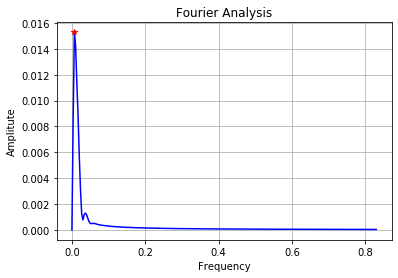

In [88]:
rate=100
time_spacing=1/rate
t=np.arange(0,300,time_spacing)
mu=1/70
beta=1
gamma=1/3
sigma=1/7
R_sub_0 = beta/(gamma+mu)

fft_I = fft(I_demography_death1-np.mean(I_demography_death1))
## FFT return the Normlized magnitute of wave of each freq
normlized_fft_I = abs(fft_I)/len(t)
#find frequency

X_freq = fftfreq(normlized_fft_I.size, time_spacing)#in order to find the x axis
#fftfreq(n, d)  n : int Window length.   d : scalarSample spacing
print("normlized_fft_I and length of frequ:", normlized_fft_I.size,len(X_freq))
plt.plot(X_freq[0:250],normlized_fft_I[0:250], c="blue")  # First freq can be aboundent
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Amplitute")
plt.title("Fourier Analysis")

#find peaks
peaks, _ = find_peaks(normlized_fft_I[0:150], height=0.0125)#height can be dicided by u and initial is the minimum 

for i in range(len(peaks)):
    print("Frequency and Amplitute:",X_freq[peaks[i]],normlized_fft_I[peaks[i]])
    x=X_freq[peaks[i]]
    y=normlized_fft_I[peaks[i]]
    plt.plot(x,y,"r*")
plt.savefig("SEIRF.jpg",DPI=(1500,1500))    
# Theoretical frequency
A=1/(mu*(R_sub_0-1))
G=(1/(gamma+mu))+(1/(mu+sigma))
test_T = 2*np.pi*np.sqrt(A*G)
print("estimated freq of I wave:", 1/test_T)

/Users/hernando/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/hernando/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


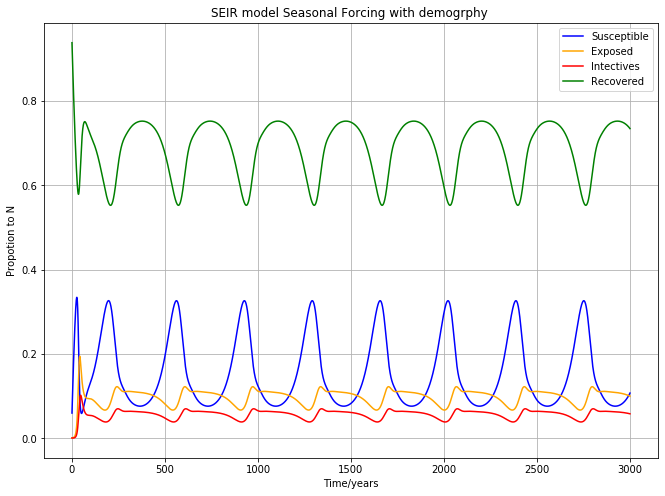

In [87]:
S0=0.06
E0=I0=0.001
R0=1-S0-E0-I0
N0=[S0,E0,I0,R0]
beta0=2
beta1=0.6
mu=1/60
gamma=1/5
sigma=1/8
omg=2*np.pi/365

t=np.arange(0,3000,0.01)

def beta(beta0,beta1,omg,t):
    return(beta0*(1+beta1*math.cos(omg*t)))

def SEIRSF(SEIR,t,args):
    S,E,I,R=SEIR
    beta0,beta1,mu,gamma,sigma=args
    dSdt=mu-beta(beta0,beta1,omg,t)*S*I-mu*S
    dEdt=beta(beta0,beta1,omg,t)*S*I-(mu+sigma)*E
    dIdt=sigma*E-(mu+gamma)*I
    dRdt=gamma*I-mu*R
    return [dSdt,dEdt,dIdt,dRdt] 

solution=scipy.integrate.odeint(SEIRSF,N0,t,args=([beta0,beta1,mu,gamma,sigma],))
plt.figure(figsize=(11,8))
plt.title("SEIR model Seasonal Forcing with demogrphy ")
plt.plot(t,solution[:,0],'b',label='Susceptible')
plt.plot(t,solution[:,1],'orange',label='Exposed')
plt.plot(t,solution[:,2],"r",label='Intectives')
plt.plot(t,solution[:,3],'g',label='Recovered')
plt.xlabel('Time/years')
plt.ylabel('Propotion to N')
plt.grid()
plt.legend()
plt.savefig("SEIRS.jpg",DPI=(1500,1500))
plt.show()
I_SEIRS=solution[:,2]
%matplotlib inline#帮助取消交互

normlized_fft_I and length of frequ: 300000 300000
Frequency and Amplitute: 0.0026666666666666666 0.004553641628176415
Frequency and Amplitute: 0.005333333333333333 0.002129442071141588
Frequency and Amplitute: 0.008 0.0013385188810361
Frequency and Amplitute: 0.011 0.001586359827996014
estimated freq of I wave: 0.01892703998092552


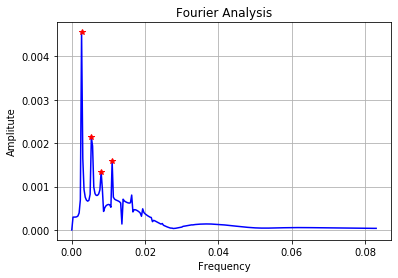

In [90]:
rate=100
time_spacing=1/rate
t=np.arange(0,3000,time_spacing)
beta=2
mu=0.02
gamma=1/5
sigma=1/8
R_sub_0 = beta/(gamma+mu)

fft_I = fft(I_SEIRS-np.mean(I_SEIRS))
## FFT return the Normlized magnitute of wave of each freq
normlized_fft_I = abs(fft_I)/len(t)
#find frequency

X_freq = fftfreq(normlized_fft_I.size, time_spacing)#in order to find the x axis
#fftfreq(n, d)  n : int Window length.   d : scalarSample spacing
print("normlized_fft_I and length of frequ:", 
      normlized_fft_I.size,len(X_freq))
plt.plot(X_freq[0:250],normlized_fft_I[0:250], c="blue")  
# First freq can be aboundent
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Amplitute")
plt.title("Fourier Analysis")

#find peaks
peaks, _ = find_peaks(normlized_fft_I[0:150], height=0.001)
#height can be dicided by u and initial is the minimum 

for i in range(len(peaks)):
    print("Frequency and Amplitute:",
          X_freq[peaks[i]],normlized_fft_I[peaks[i]])
    x=X_freq[peaks[i]]
    y=normlized_fft_I[peaks[i]]
    plt.plot(x,y,"r*")
plt.savefig("SEIRSF.jpg",DPI=(1500,1500))
# Theoretical frequency
A=1/(mu*(R_sub_0-1))
G=(1/(gamma+mu))+(1/(mu+sigma))
test_T = 2*np.pi*np.sqrt(A*G)
print("estimated freq of I wave:", 1/test_T)